# Import Dependency

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import math
import json
import copy
import random
import time
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import os.path
from os import path

In [29]:
TIME = str(int(time.time()))
PLOT_DETAIL_VISIBLE = False
PLOT_VISIBLE = True
PLOT_SAVE = True
RESULT_SAVE = True

#colab Folder
DRIVE_PATH = '/content/drive/MyDrive/Colab Notebooks/dataset_ip/'

# Dataset
DATA_SOURCE_NAME = '30nov-04des'
DATA_SOURCE_PATH = 'dataset/raw/'+DATA_SOURCE_NAME+'.csv'

EXPORT_PATH = 'dataset/anomaly/'
TEST_RECORD_FILE_NAME = EXPORT_PATH+DATA_SOURCE_NAME+'_'+'_anomaly_record'+'_'+TIME+'.csv'
TEST_FILE_NAME = EXPORT_PATH+DATA_SOURCE_NAME+'_'+'_anomaly'+'_'+TIME+'.csv'

PLOT_EXPORT_PATH  = EXPORT_PATH+'plot/'
PLOT_SPACE = 20 #jarak tambahan yang berikan sebelum dan setelah untuk menampilkan grafik


ENCODING = "ISO-8859-1" # csv encoding
DATE_COL_NAME = 'date'
tensorlogs = [
              DATE_COL_NAME,
              "Excitation Field Current", #0
              "Excitation Field Voltage", #1
              "Power Factor", #2
              "Reactive Power", #3
              "Generator Gross Capacity", #4
            ]

## Import and Reshape Data

In [30]:
print("data path: ", DATA_SOURCE_PATH)
df_test_original = pd.read_csv  (filepath_or_buffer=DATA_SOURCE_PATH, header=0, sep=',')
df_test_original = df_test_original.loc[:, df_test_original.columns.intersection(tensorlogs)]
df_test_original.head(3)

data path:  dataset/raw/30nov-04des.csv


,date,Excitation Field Current,Excitation Field Voltage,Power Factor,Reactive Power,Generator Gross Capacity
0,12/4/2020 23:58,1305.266235,249.413391,1.009708,39.430138,227.282471
1,12/4/2020 23:57,1306.075195,249.393478,1.009896,39.989986,226.886704
2,12/4/2020 23:56,1304.254761,248.918274,1.010083,40.220341,226.586502


In [31]:
#reshape data
# df_test_original = reshape(df_test_original)
df_test_original[DATE_COL_NAME] = pd.to_datetime(df_test_original[DATE_COL_NAME])
df_test_original.sort_values(by=DATE_COL_NAME, ascending=True, inplace=True)
df_test_original = df_test_original.reset_index(drop=True)

In [32]:
df_test_original.head(3)

,date,Excitation Field Current,Excitation Field Voltage,Power Factor,Reactive Power,Generator Gross Capacity
0,2020-11-30 00:00:00,1287.066040,244.525864,1.014854,30.824528,229.101044
1,2020-11-30 00:01:00,1289.571045,244.883667,1.014548,31.553169,229.160934
2,2020-11-30 00:02:00,1288.980103,244.913193,1.014242,31.269320,229.037643


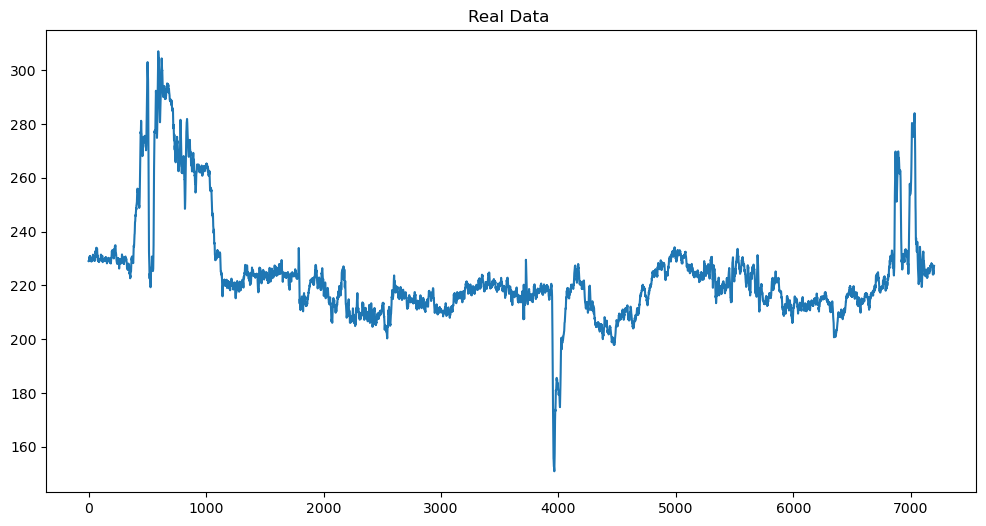

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df_test_original['Generator Gross Capacity'])
plt.title('Real Data ')
# plt.savefig(PLOT_EXPORT_PATH + prefix + 'Trend.jpg')
plt.show()

## Fungsi

In [37]:
def plot_all_sensor(df,anomaly_type,anomaly_count):
  plt.figure(figsize=(20, 5))
  plt.plot(df.index, df[sensor], color='r', label='sintetic')
  plt.plot(df_test_original.index, df_test_original[sensor],color='b', label='original')
  if anomaly_type == "extreme":
    for start in anomaly_locations[anomaly_type]['timestamps'][anomaly_count]:
      plt.axvspan(start-1, start+1, alpha=0.2, color='red')
  else:
    for start, end in anomaly_locations[anomaly_type]['timestamps'][anomaly_count]:
      plt.axvspan(start-1, end+1, alpha=0.2, color='red')
    
  plt.xlabel('Timestamp')
  plt.ylabel('Value')
  plt.legend()
  plt.title(sensor+' - real vs '+anomaly_type+' syntetic Anomaly')
  if PLOT_SAVE:
    plt.savefig(PLOT_EXPORT_PATH+anomaly_type+'/'+str(anomaly_count+1)+'_'+sensor+'.jpg')
  plt.show()

In [38]:
def plot_single_sensor(df_plot,anomaly_type,start,end,anomaly_count):
  plot_start = start - PLOT_SPACE
  plot_end = end + PLOT_SPACE
  plt.figure(figsize=(10, 5))
  plt.plot(df_plot.loc[plot_start:plot_end].index, df_plot.loc[plot_start:plot_end,sensor], color='r', label='syntetic')
  plt.plot(df_test_original.loc[plot_start:plot_end].index, df_test_original.loc[plot_start:plot_end,sensor], color='b', label='original')
  plt.legend()
  plt.xlabel('Timestamp')
  plt.ylabel('Value')
  plt.legend()
  plt.title(sensor+' - real vs '+anomaly_type+' syntetic anomaly')
  plt.savefig(PLOT_EXPORT_PATH+anomaly_type+'/'+str(anomaly_count+1)+'_'+sensor+'_'+str(start)+'-'+str(end)+'.jpg')
  plt.show()

# Anomaly Parameter

In [39]:
anomaly_locations = {
       'extreme': {
        'timestamps': [
          [(1200)],
          [(1200),(1800)],
          [(1200),(1800),(2400)],
          [(1200),(1800),(2400),(3000)],
          [(1200),(1800),(2400),(3000),(3600)],
          [(1200),(1800),(2400),(3000),(3600),(4200)],
          [(1200),(1800),(2400),(3000),(3600),(4200),(4800)],
          [(1200),(1800),(2400),(3000),(3600),(4200),(4800),(5400)],
          [(1200),(1800),(2400),(3000),(3600),(4200),(4800),(5400),(6000)],
          [(1200),(1800),(2400),(3000),(3600),(4200),(4800),(5400),(6000),(6600)],
        ],
        'factor': 8
    },
    'shift': {
        'timestamps': [
          [(1200,1300)],
          [(1200,1300),(1800,1900)],
          [(1200,1300),(1800,1900),(2400,2500)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500),(6000,6100)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500),(6000,6100),(6600,6700)],
        ],
        'factor': 3.5
    },
    'trend': {
        'timestamps': [
          [(1200,1300)],
          [(1200,1300),(1800,1900)],
          [(1200,1300),(1800,1900),(2400,2500)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500),(6000,6100)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500),(6000,6100),(6600,6700)],
        ],
        'factor': 0.5
    },
    'variance': {
       'timestamps': [
          [(1200,1300)],
          [(1200,1300),(1800,1900)],
          [(1200,1300),(1800,1900),(2400,2500)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500),(6000,6100)],
          [(1200,1300),(1800,1900),(2400,2500),(3000,3100),(3600,3700),(4200,4300),(4800,4900),(5400,5500),(6000,6100),(6600,6700)],
        ],
        'factor': 8
    }
}

# Anomaly Generator

In [40]:
detection_start_time = datetime.now()
print('Generate Start Time: ',detection_start_time)

Generate Start Time:  2023-05-19 11:12:49.854872


## Extreme

In [47]:
PLOT_SAVE = False
RESULT_SAVE = False


| ========================================================================================== |
| Generate Extreme Anomaly:  Excitation Field Current _ 9


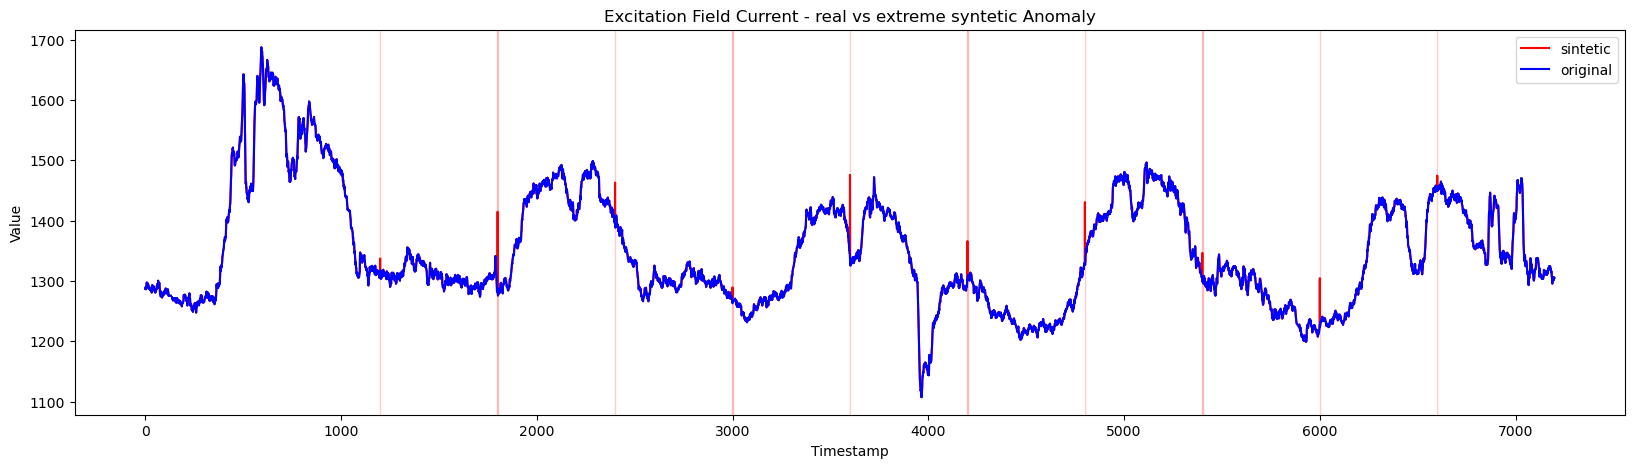


| ========================================================================================== |
| Generate Extreme Anomaly:  Excitation Field Voltage _ 9


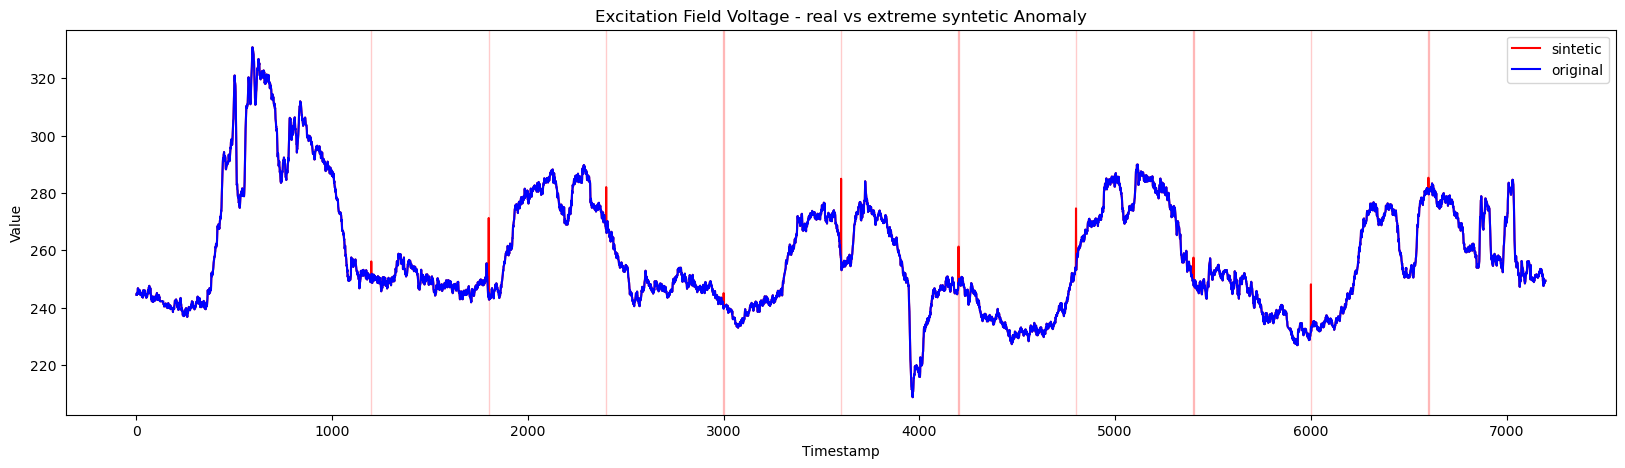


| ========================================================================================== |
| Generate Extreme Anomaly:  Power Factor _ 9


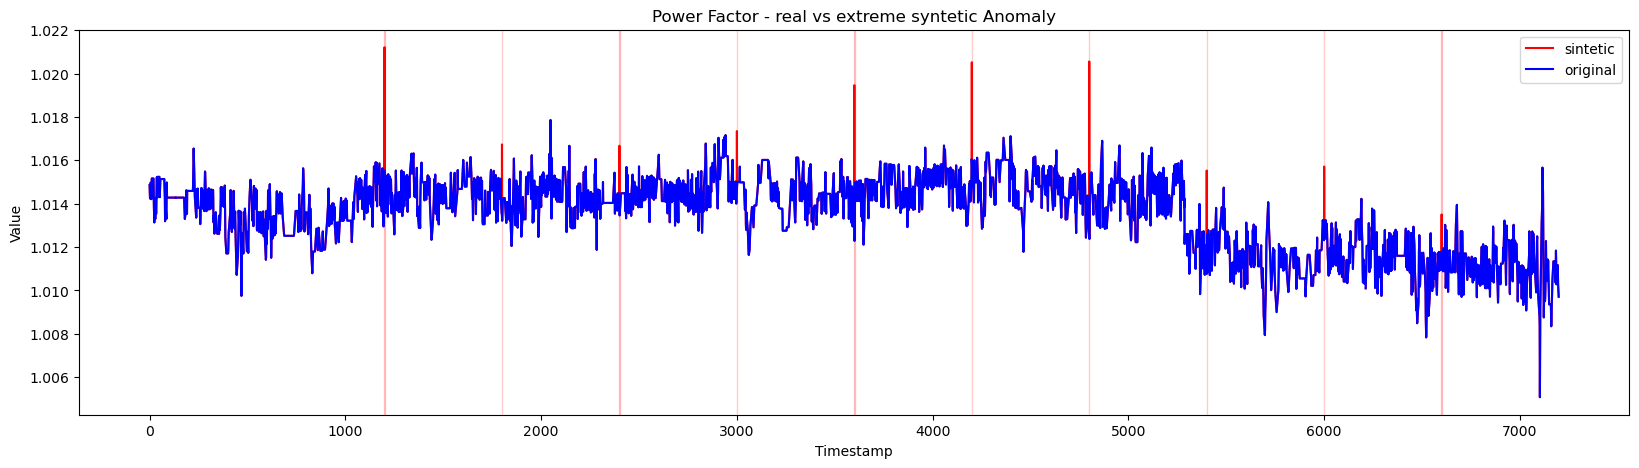


| ========================================================================================== |
| Generate Extreme Anomaly:  Reactive Power _ 9


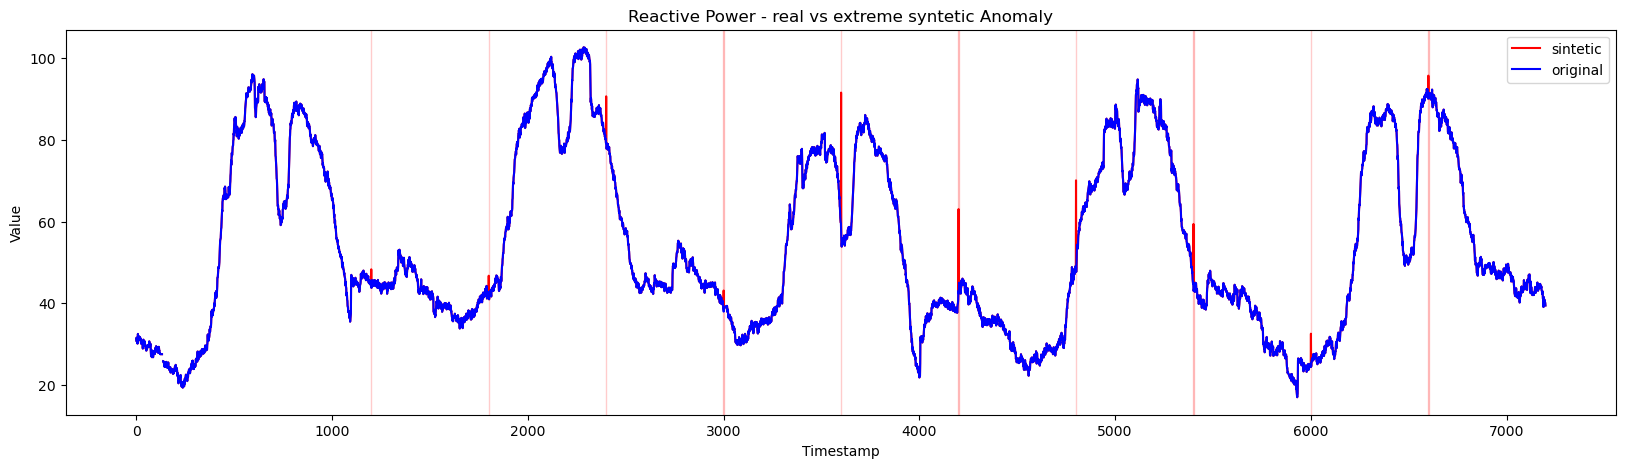


| ========================================================================================== |
| Generate Extreme Anomaly:  Generator Gross Capacity _ 9


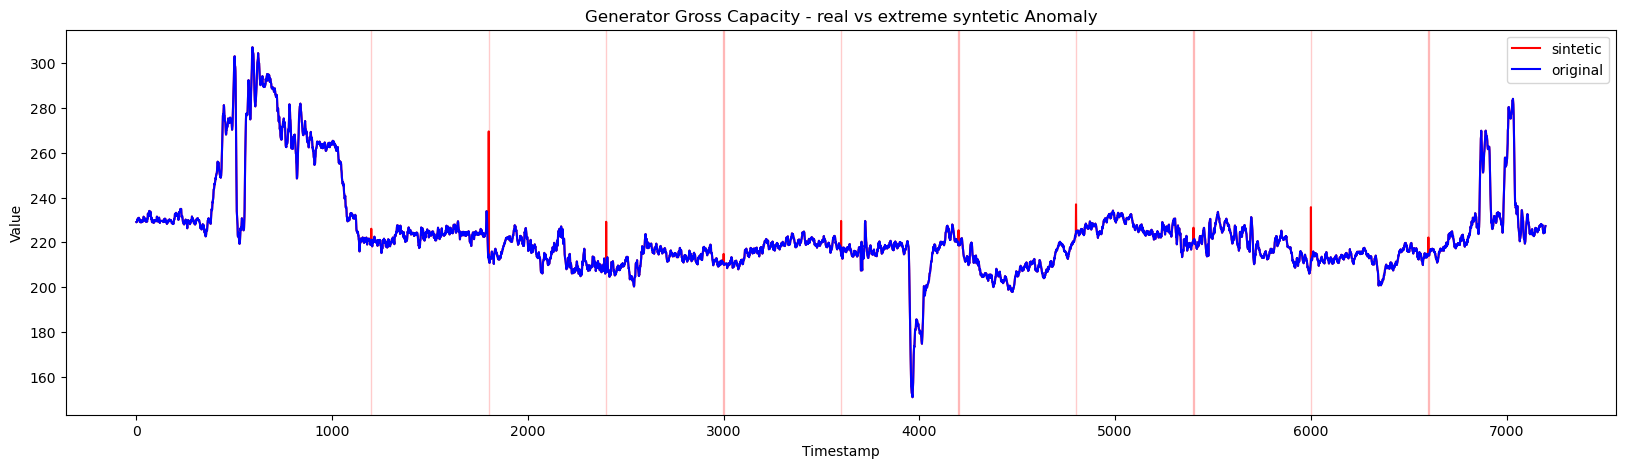

Save to:  dataset/anomaly/30nov-04des_extreme10.csv


In [53]:
#Extreme

for anomaly_count in range(9,10):
  df_extreme = df_test_original.copy()
  for sensor in tensorlogs[1:]:
    print('\n| ========================================================================================== |')
    print('| Generate Extreme Anomaly: ',sensor,'_',anomaly_count)
    
    min = df_extreme[sensor].min()
    max = df_extreme[sensor].max()

    for current_timestamp in anomaly_locations['extreme']['timestamps'][anomaly_count]:
      rand = 1
      anomaly_value = 0
      # local_std = df_extreme.iloc[current_timestamp - 10:current_timestamp + 10,2].std()
      local_std = df_extreme.loc[current_timestamp-10:current_timestamp+10 ,sensor].std() #get local std n-10:n+10
      anomaly_value =  (local_std * anomaly_locations['extreme']['factor'])

      df_extreme.loc[current_timestamp:current_timestamp, sensor] = df_extreme.loc[current_timestamp:current_timestamp, sensor]+anomaly_value
      # print(df_extreme.loc[current_timestamp, sensor]," > ",local_std,"*",anomaly_locations['extreme']['factor']," > ", df_extreme.loc[current_timestamp, sensor]+anomaly_value)

      # if PLOT_DETAIL_VISIBLE:
      #   plot_single_sensor(df_extreme,'extreme',current_timestamp,current_timestamp,anomaly_count)

    if PLOT_VISIBLE:
      plot_all_sensor(df_extreme,'extreme',anomaly_count)

  #export data anomaly
  if RESULT_SAVE:
    df_extreme.to_csv(os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_extreme'+str(anomaly_count+1)+'.csv'))
    print('Save to: ',os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_extreme'+str(anomaly_count+1)+'.csv'))


## Shift

In [49]:
PLOT_SAVE = True
RESULT_SAVE = True

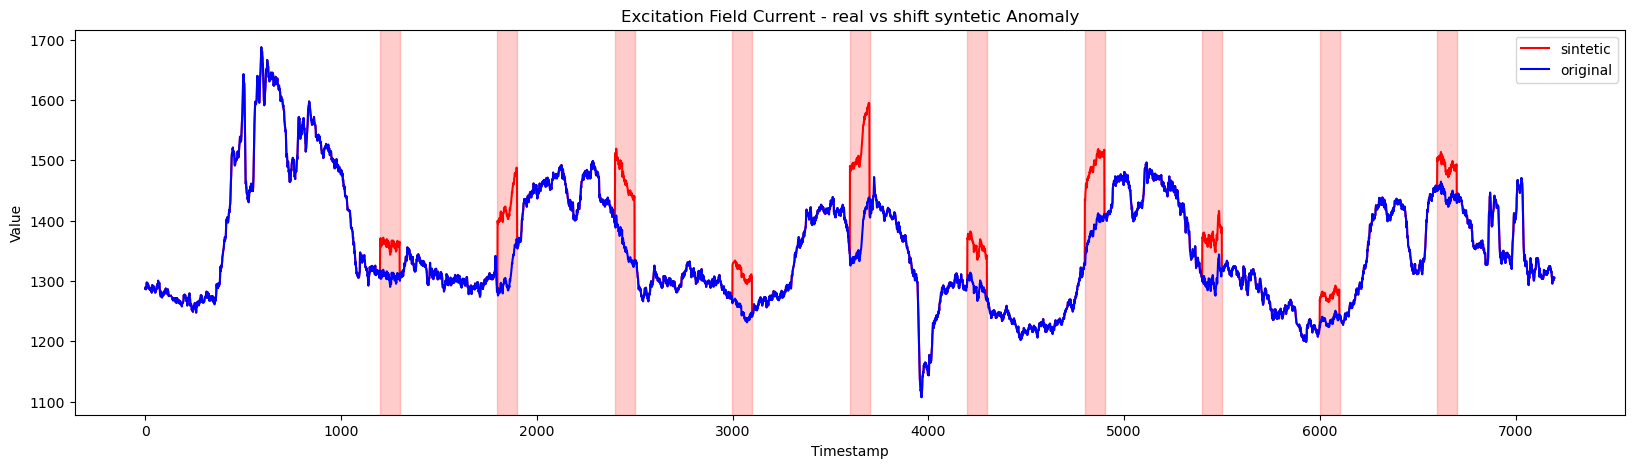

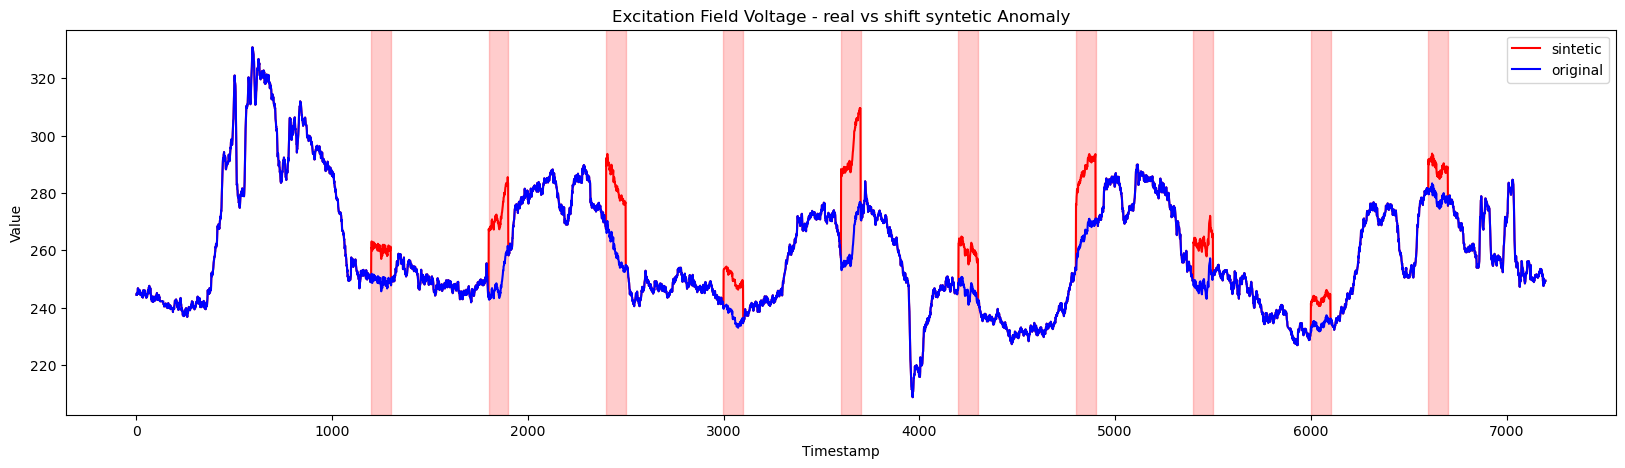

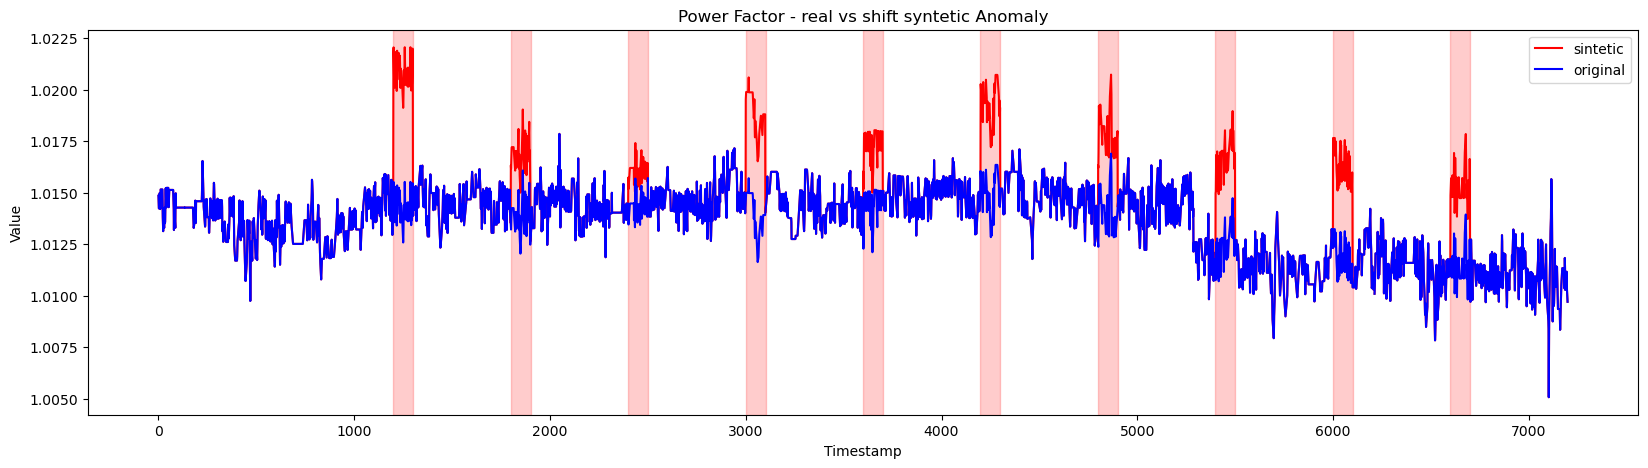

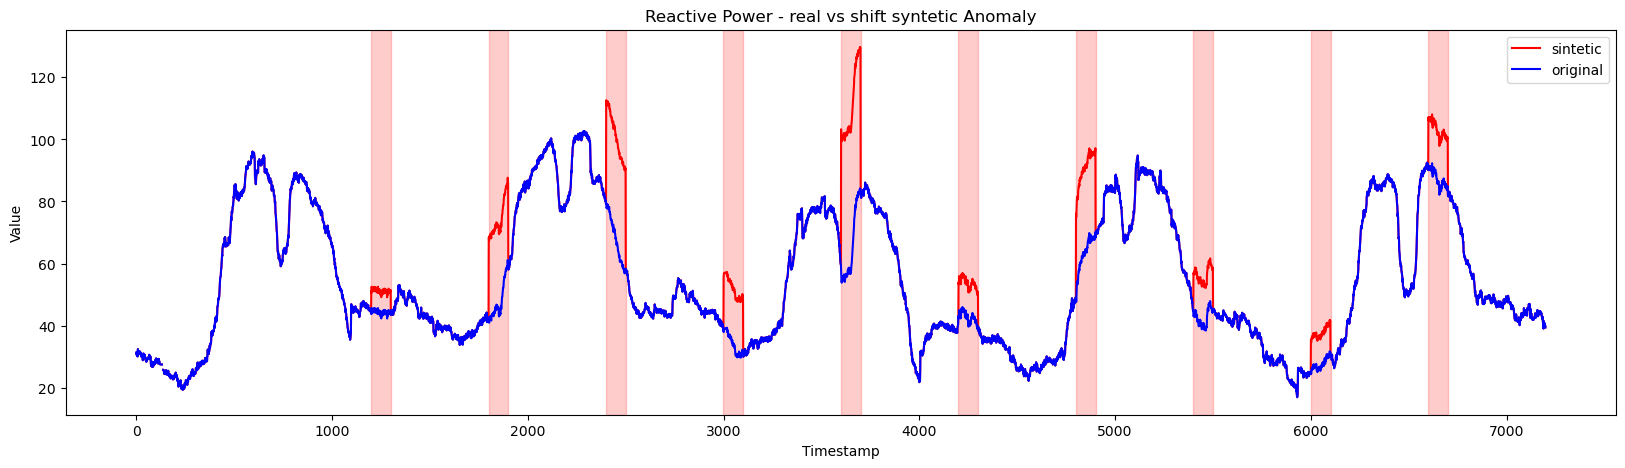

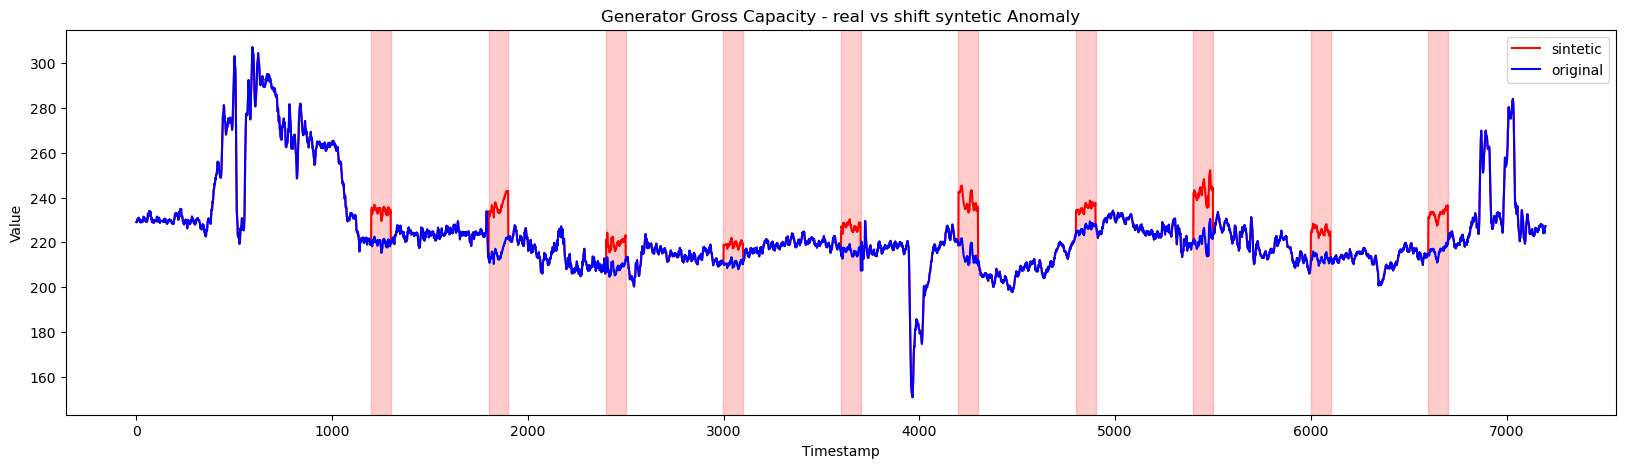

Save to:  dataset/anomaly/30nov-04des_shift10.csv


In [50]:
for anomaly_count in range(9,10):
  df_shift = df_test_original.copy()
  for sensor in tensorlogs[1:]:
    if sensor =='Excitation Field Current':
      kf = 5
    elif sensor =='Excitation Field Voltage':
      kf = 5
    elif sensor =='Power Factor':
      kf = 5
    elif sensor =='Reactive Power':
      kf = 5
    elif sensor =='Generator Gross Capacity':
      kf = 6

    for start, end in anomaly_locations['shift']['timestamps'][anomaly_count]:
      local_std = df_shift.loc[start-10: end + 10,sensor].std()
      # anomaly_value = np.random.choice([-1, 1]) * anomaly_locations['shift']['factor'] * local_std
      anomaly_value = 1 * kf * local_std

      for current_timestamp in range(start, end):
        if start == anomaly_locations['shift']['timestamps'][anomaly_count][0][0]:
          df_shift.loc[current_timestamp, sensor] = df_shift.loc[current_timestamp, sensor] + anomaly_value*2 #apply anomaly value
        elif start == anomaly_locations['shift']['timestamps'][anomaly_count][1][0] or start == anomaly_locations['shift']['timestamps'][anomaly_count][2][0] or start == anomaly_locations['shift']['timestamps'][anomaly_count][4][0] or start == anomaly_locations['shift']['timestamps'][anomaly_count][6][0]:
          df_shift.loc[current_timestamp, sensor] = df_shift.loc[current_timestamp, sensor] + anomaly_value*0.8 #apply anomaly value
        else:
          df_shift.loc[current_timestamp, sensor] = df_shift.loc[current_timestamp, sensor] + anomaly_value #apply anomaly value
          # print(df_extreme.loc[current_timestamp, sensor]," > ",local_std,"*",anomaly_locations['shift']['factor']," > ", anomaly_value)

      if PLOT_DETAIL_VISIBLE:
        plot_single_sensor(df_shift,'shift',start,end,anomaly_count)

    if PLOT_VISIBLE:
      plot_all_sensor(df_shift,'shift',anomaly_count)

  #export data anomaly
  if RESULT_SAVE:
    df_shift.to_csv(os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_shift'+str(anomaly_count+1)+'.csv'))
    print('Save to: ',os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_shift'+str(anomaly_count+1)+'.csv'))

## Variance

In [51]:
PLOT_SAVE = True
RESULT_SAVE = True

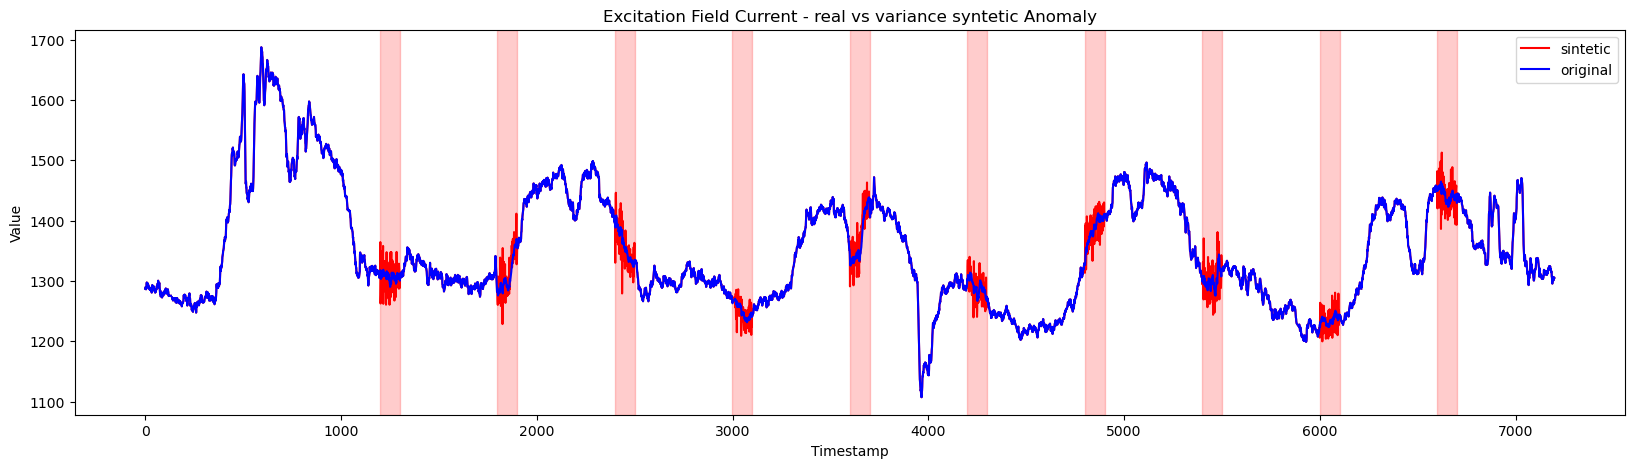

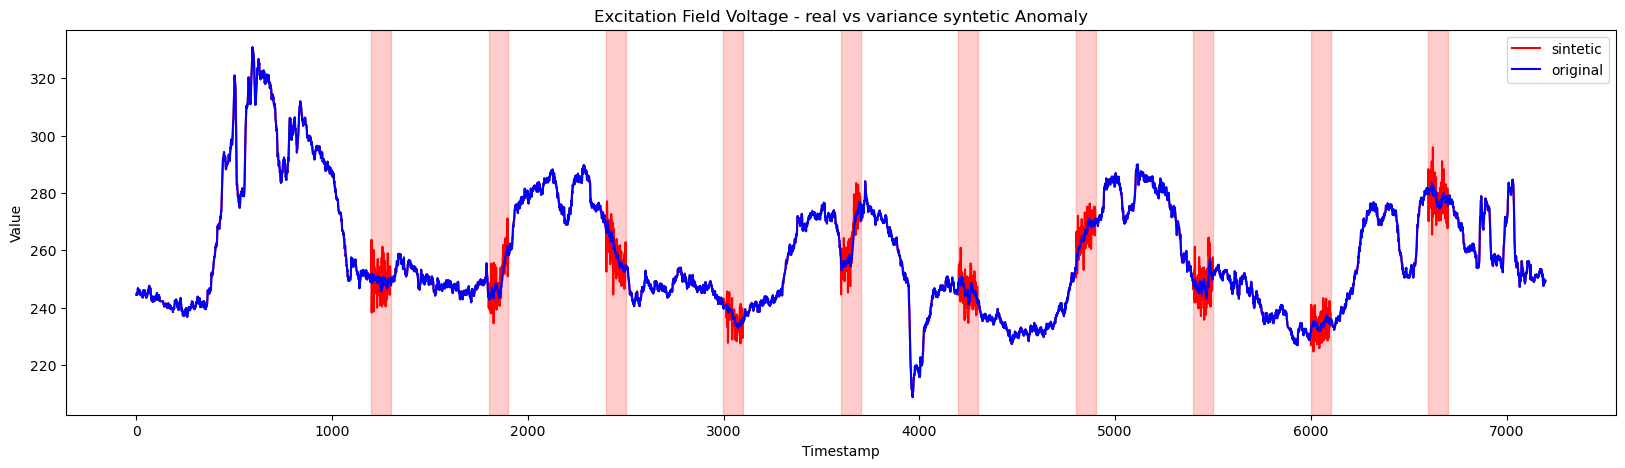

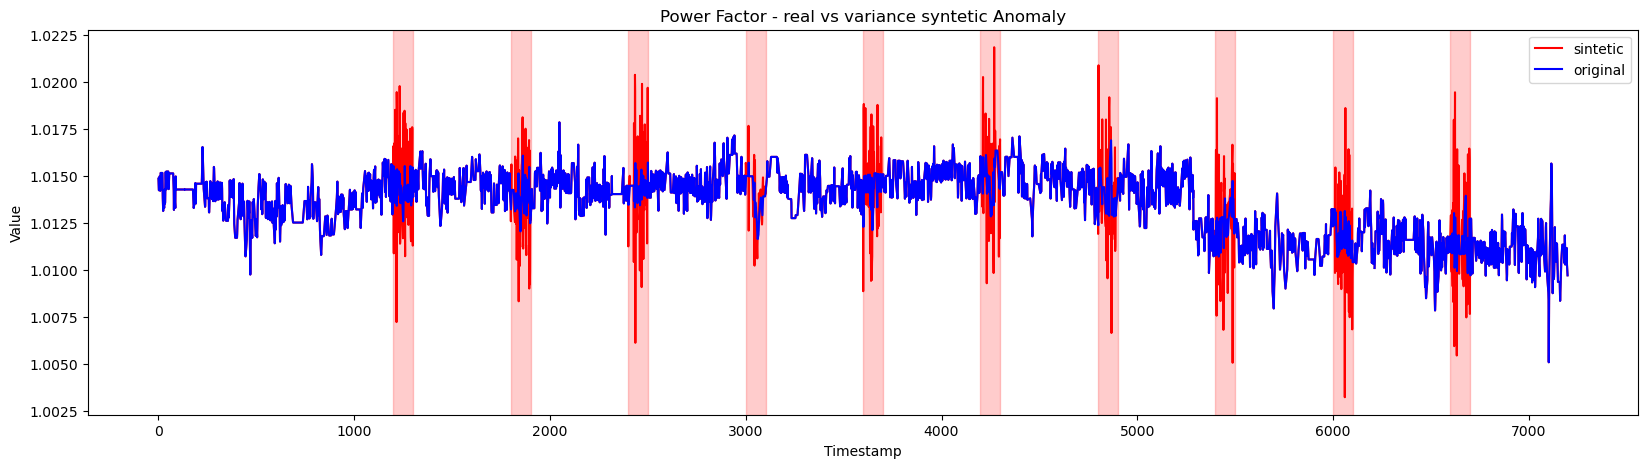

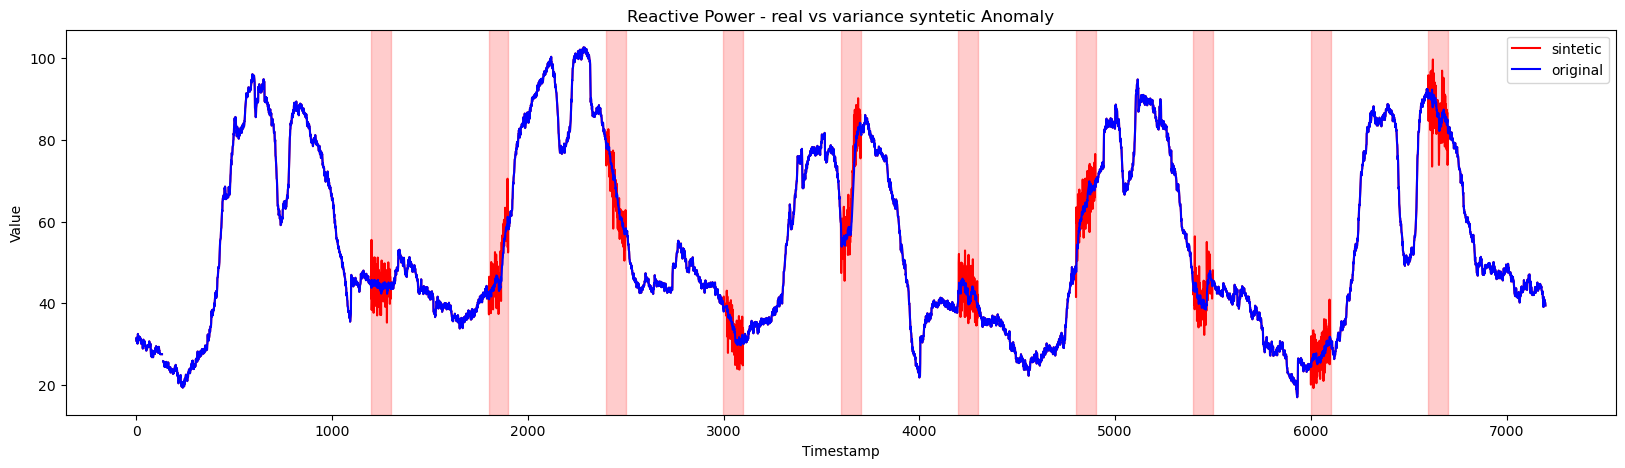

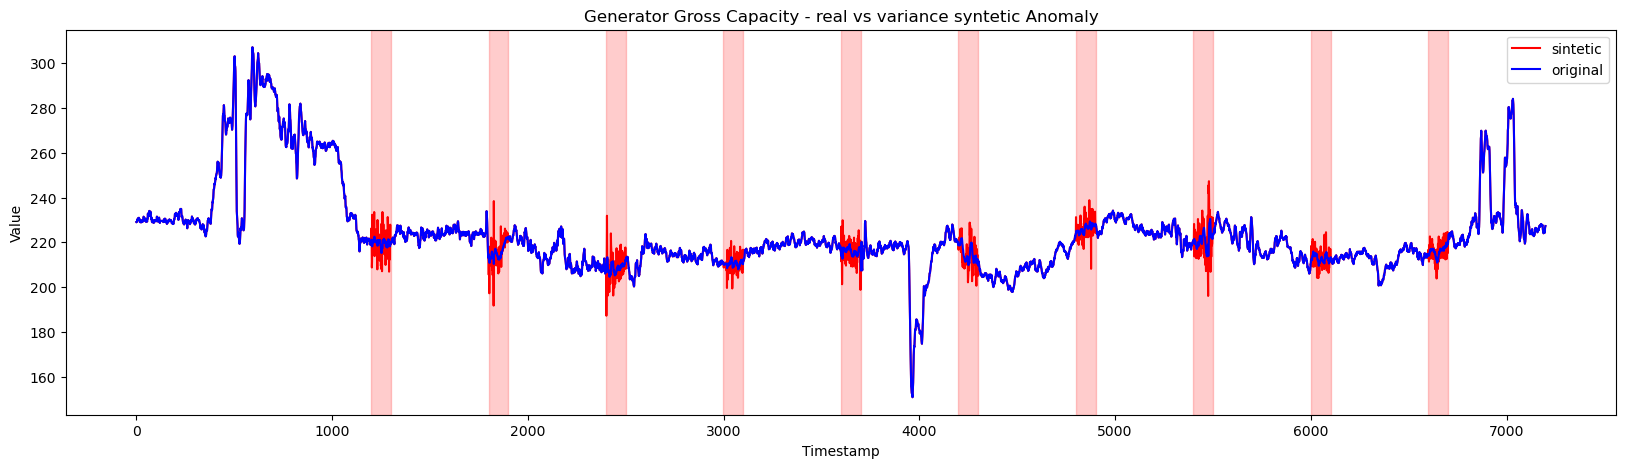

Save to:  dataset/anomaly/30nov-04des_variance10.csv


In [52]:
# Variance
for anomaly_count in range(9,10):
  df_variance = df_test_original.copy()
  for sensor in tensorlogs[1:]:
    for start, end in anomaly_locations['variance']['timestamps'][anomaly_count]:
      
      if sensor =='Excitation Field Current':
        kf = 6
      elif sensor =='Excitation Field Voltage':
        kf = 6
      elif sensor =='Power Factor':
        kf = 5
      elif sensor =='Reactive Power':
        kf = 6
      elif sensor =='Generator Gross Capacity':
        kf = 7
      
      difference = np.diff(df_variance.loc[start:end,sensor]) if start > 0 else np.insert(np.diff(df_variance.loc[start:end,sensor]), 0, 0)
      i=0

      for current_timestamp in range(start, end):
        # print(df_extreme.loc[current_timestamp, sensor]," > ",difference[i],"*",anomaly_locations['shift']['factor']," > ", df_variance.at[current_timestamp, sensor] + (param['variance']['factor'] * difference[i]))
        df_variance.at[current_timestamp, sensor] = df_variance.at[current_timestamp, sensor] + (kf * difference[i])
        
        i+=1

      if PLOT_DETAIL_VISIBLE:
        plot_single_sensor(df_variance,'variance',start,end,anomaly_count)

    if PLOT_VISIBLE:
      plot_all_sensor(df_variance,'variance',anomaly_count)

  #export data anomaly
  if RESULT_SAVE:
    df_variance.to_csv(os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_variance'+str(anomaly_count+1)+'.csv'))
    print('Save to: ',os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_variance'+str(anomaly_count+1)+'.csv'))

## Trend

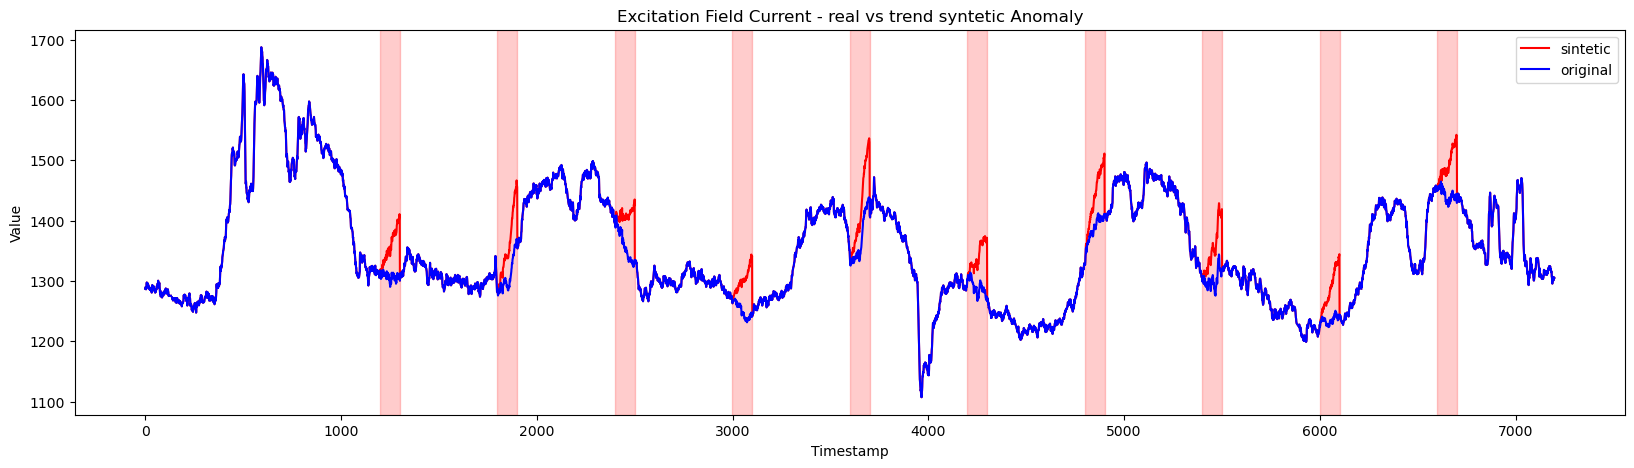

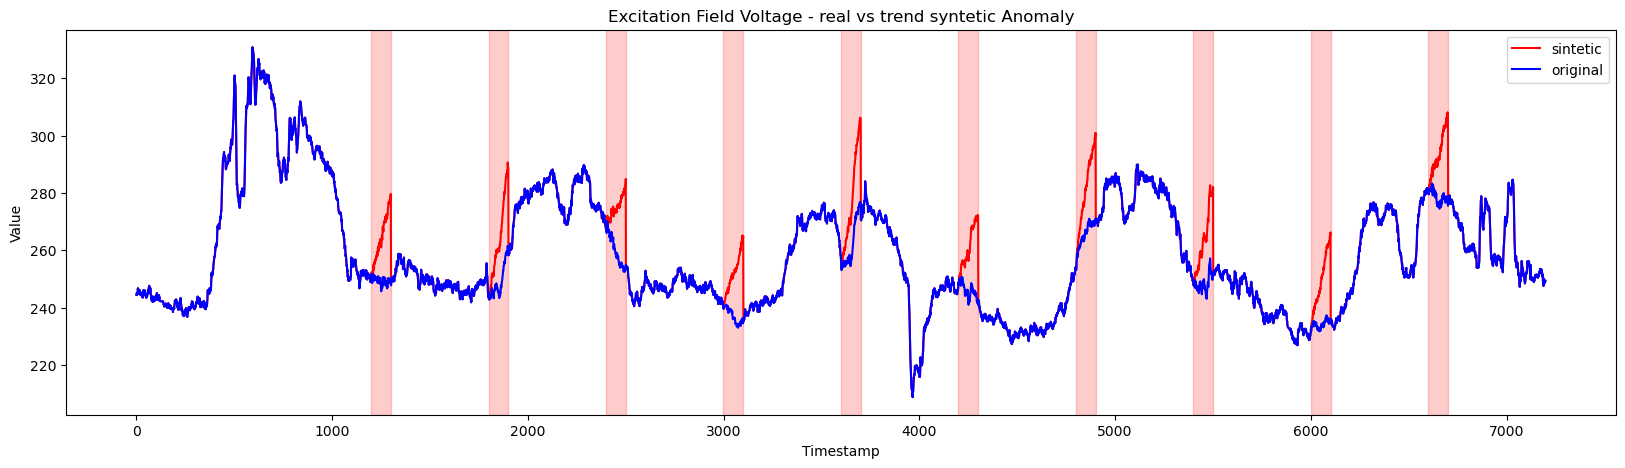

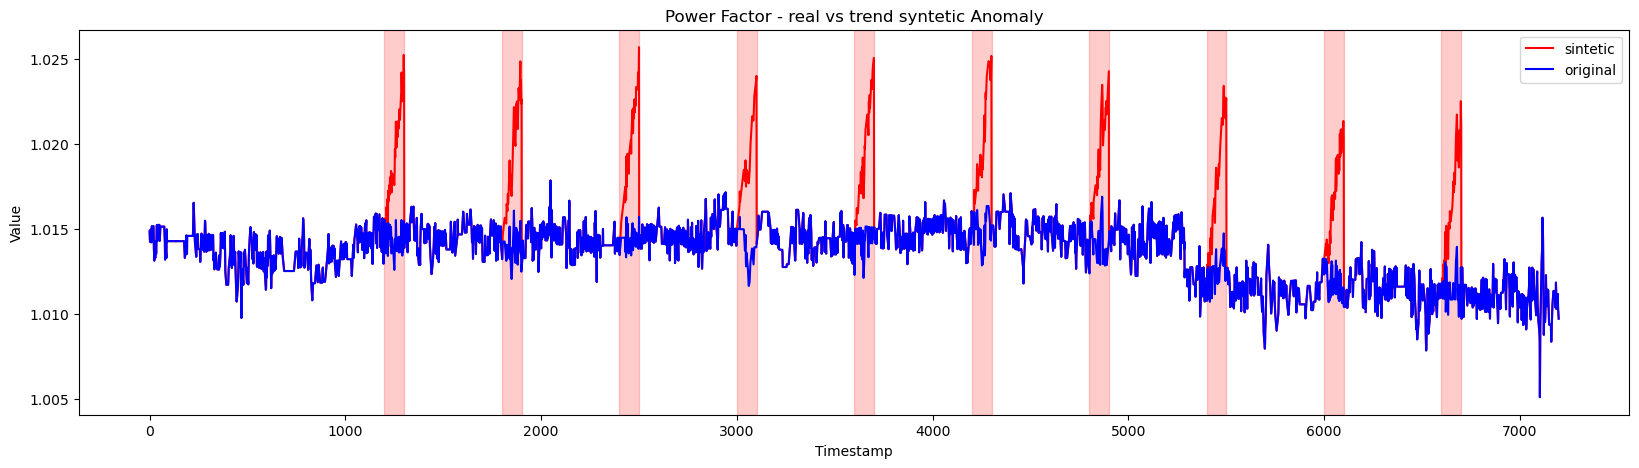

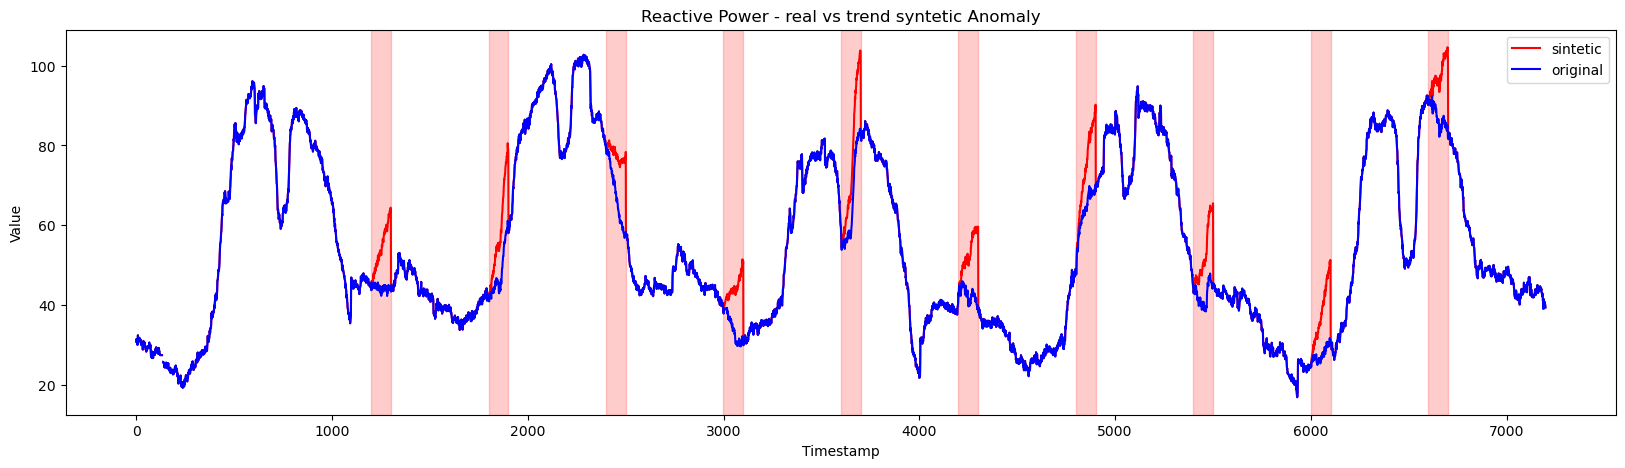

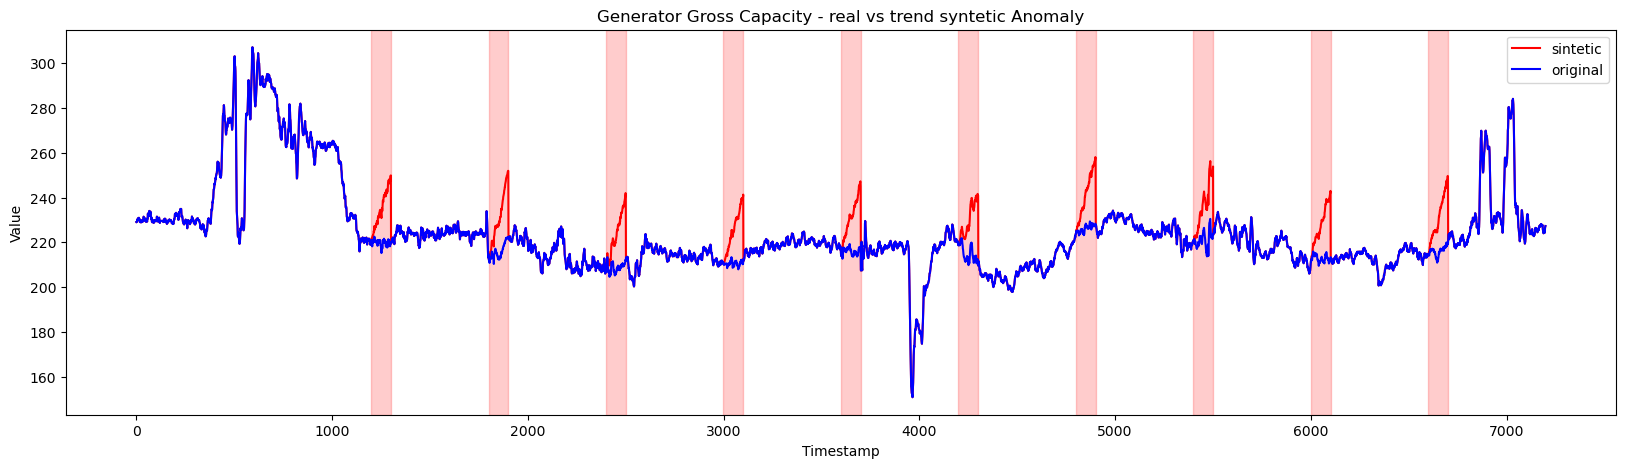

Save to:  dataset/anomaly/30nov-04des_trend10.csv


In [46]:
#Trend
for anomaly_count in range(9,10):
  df_trend = df_test_original.copy()
  for sensor in tensorlogs[1:]:
    for start, end in anomaly_locations['trend']['timestamps'][anomaly_count]:
      additional_values = np.zeros(end+1-start)

      if sensor =='Excitation Field Current':
        slope = np.random.choice([1]) * 1 * np.arange(end+1 - start)
      elif sensor =='Excitation Field Voltage':
       slope = np.random.choice([1]) * 0.3 * np.arange(end+1 - start)
      elif sensor =='Power Factor':
       slope = np.random.choice([1]) * 0.0001 * np.arange(end+1 - start)
      elif sensor =='Reactive Power':
        slope = np.random.choice([1]) * 0.2 * np.arange(end+1 - start)
      elif sensor =='Generator Gross Capacity':
        slope = np.random.choice([1]) * 0.3 * np.arange(end+1 - start)

      i=0
      for current_timestamp in range(start,end+1):
        df_trend.at[current_timestamp, sensor] = df_trend.at[current_timestamp, sensor] + slope[i]
        i+=1
    
      # Create plot per sensor
      if PLOT_DETAIL_VISIBLE:
        plot_single_sensor(df_trend,'trend',start,end,anomaly_count)
    
    if PLOT_VISIBLE:
      plot_all_sensor(df_trend,'trend',anomaly_count)

  #export data anomaly
  if RESULT_SAVE:
    df_trend.to_csv(os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_trend'+str(anomaly_count+1)+'.csv'))
    print('Save to: ',os.path.join(EXPORT_PATH+DATA_SOURCE_NAME+'_trend'+str(anomaly_count+1)+'.csv'))